<a href="https://colab.research.google.com/github/GIHYEON-KIM/Hello/blob/main/n221-decision-trees/n221a-decision-trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) EDA를 수행합시다

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- 분류기의 기준모델을 설정하세요.
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
target = 'vacc_h1n1_f'
train = pd.concat([pd.read_csv('./data/train.csv'),pd.read_csv('./data/train_labels.csv')[target]],axis = 1)
test = pd.read_csv('./data/test.csv')
train.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,census_region,census_msa,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state,vacc_h1n1_f
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4,"MSA, Not Principle City",2.0,3.0,5.0,NaN,NaN,9,CALIFORNIA,0
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,"MSA, Principle City",1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA,0
2,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,"MSA, Not Principle City",1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS,0


In [ ]:
train.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,sex_i,inc_pov,marital,rent_own_r,census_region,n_adult_r,household_children,n_people_r,hhs_region,vacc_h1n1_f
count,33734.000000,33734.000000,33635.000000,33482.000000,33710.000000,33683.000000,33640.000000,33633.000000,33571.000000,40269.000000,...,42154.000000,42154.000000,31955.000000,39958.000000,42154.000000,41845.000000,41845.000000,42020.000000,42154.000000,42154.000000
mean,1.617004,1.260272,0.050691,0.727824,0.067784,0.824333,0.355618,0.338239,0.678770,0.241724,...,1.571832,2.132728,1.464059,2.915261,2.706457,1.937460,0.797156,2.738505,5.352991,0.239052
std,0.910609,0.619327,0.219370,0.445087,0.251379,0.380542,0.478707,0.473117,0.466956,0.428133,...,0.494819,0.991463,0.498714,12.597018,1.033513,0.745174,1.039354,1.393333,2.705101,0.426510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,0.000000,2.000000,5.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,4.000000,8.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,99.000000,4.000000,4.000000,3.000000,7.000000,10.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42154 entries, 0 to 42153
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 33734 non-null  float64
 1   h1n1_knowledge               33734 non-null  float64
 2   behavioral_antiviral_meds    33635 non-null  float64
 3   behavioral_avoidance         33482 non-null  float64
 4   behavioral_face_mask         33710 non-null  float64
 5   behavioral_wash_hands        33683 non-null  float64
 6   behavioral_large_gatherings  33640 non-null  float64
 7   behavioral_outside_home      33633 non-null  float64
 8   behavioral_touch_face        33571 non-null  float64
 9   doctor_recc_h1n1             40269 non-null  float64
 10  doctor_recc_seasonal         40269 non-null  float64
 11  chronic_med_condition        40837 non-null  float64
 12  child_under_6_months         32705 non-null  float64
 13  health_insurance

In [ ]:
train.isnull().sum()

h1n1_concern                    8420
h1n1_knowledge                  8420
behavioral_antiviral_meds       8519
behavioral_avoidance            8672
behavioral_face_mask            8444
behavioral_wash_hands           8471
behavioral_large_gatherings     8514
behavioral_outside_home         8521
behavioral_touch_face           8583
doctor_recc_h1n1                1885
doctor_recc_seasonal            1885
chronic_med_condition           1317
child_under_6_months            9449
health_insurance               19421
health_worker                   9430
opinion_h1n1_vacc_effective     8779
opinion_h1n1_risk               8825
opinion_h1n1_sick_from_vacc     8869
opinion_seas_vacc_effective     8934
opinion_seas_risk               9001
opinion_seas_sick_from_vacc     9065
agegrp                             0
education_comp                 10166
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                        10199
r

In [ ]:
train_0 = train[train['vacc_h1n1_f'] == 0]
train_1 = train[train['vacc_h1n1_f'] == 1]

#### 고용 여부

[(0.0, 20000.0)]

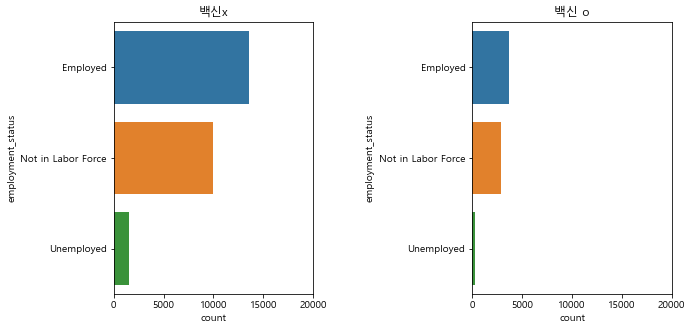

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

ax1 = sns.countplot(data = train_0.sort_values('employment_status'), y = 'employment_status', ax = axes[0])
ax1.set_title('백신x')
ax1.set(xlim=(0, 20000))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
ax2 = sns.countplot(data = train_1.sort_values('employment_status'), y = 'employment_status', ax = axes[1])
ax2.set_title('백신 o')
ax2.set(xlim=(0, 20000))

Text(0.5, 1.0, '백신 o')

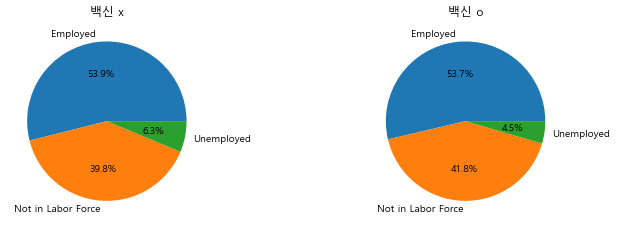

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

plt.subplot(1,2,1)
plt.pie(train_0.sort_values('employment_status')['employment_status'].value_counts(), autopct='%1.1f%%', labels=['Employed', 'Not in Labor Force', 'Unemployed'])
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
plt.pie(train_1.sort_values('employment_status')['employment_status'].value_counts(), autopct='%1.1f%%', labels=['Employed', 'Not in Labor Force', 'Unemployed'])
plt.title('백신 o')

- 고용여부는 백신을 맞은 여부와 상관없이 비율이 비슷하므로 이 feature는 사용하지 않기로 하자.

In [ ]:
train = train.drop('employment_status', axis = 1)
test = test.drop('employment_status', axis = 1)

#### employment_industry / occupation

[(0.0, 2000.0)]

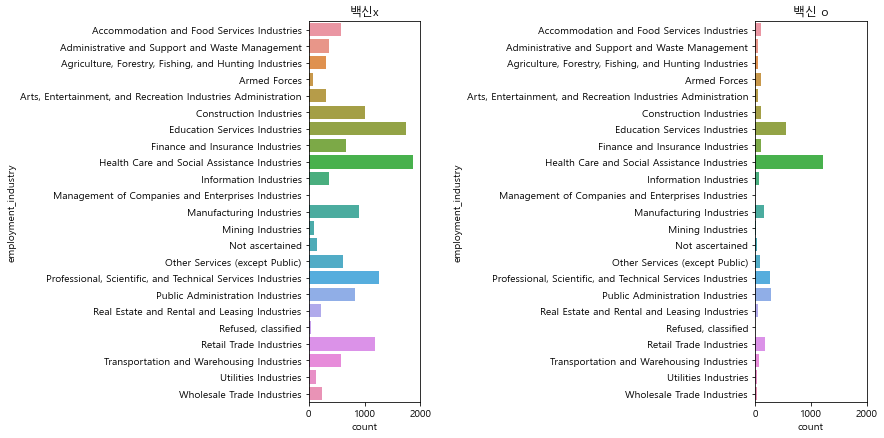

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,7))

ax1 = sns.countplot(data = train_0.sort_values('employment_industry'), y = 'employment_industry', ax = axes[0])
ax1.set_title('백신x')
ax1.set(xlim=(0, 2000))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)
ax2 = sns.countplot(data = train_1.sort_values('employment_industry'), y = 'employment_industry', ax = axes[1])
ax2.set_title('백신 o')
ax2.set(xlim=(0, 2000))

Text(0.5, 1.0, '백신 o')

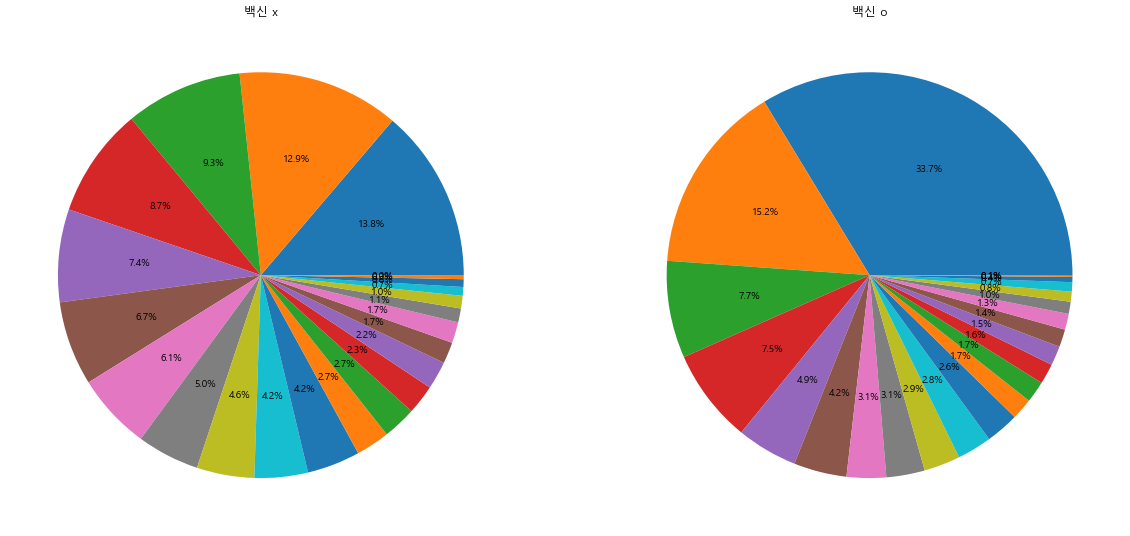

In [ ]:
fig, axes = plt.subplots(1,2)
# labels = 

fig = plt.gcf()
fig.set_size_inches(20 ,20)

plt.subplot(1,2,1)
plt.pie(train_0.sort_values('employment_industry')['employment_industry'].value_counts(), autopct='%1.1f%%')
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.pie(train_1.sort_values('employment_industry')['employment_industry'].value_counts(), autopct='%1.1f%%')
plt.title('백신 o')

In [ ]:
print("백신을 맞은 사람 중 비율이 가장 큰(33.7%) feature : ",train_1.employment_industry.value_counts().index[0])

백신을 맞은 사람 중 비율이 가장 큰(33.7%) feature :  Health Care and Social Assistance Industries


- employment_industry feature에서 Health Care직종에 종사하는 사람이 백신을 맞은 비율이 높았다.
- 따라서 Health Care 직종이냐 아니냐만 가져오기로 결정. (이미 존재하는 health worker라는 feature를 이용하면 될 것 같다.)
- 하지만, 결측치를 처리할 때 어떻게 처리하느냐에 따라 결과가 달라질 것 같다. (이 부분은 고민을 해봐야한다...)
- 이 feature는 train set에서 결측치가 약 2만 5천개 정도로, 데이터의 절반 이상을 차지한다. 따라서 일단 drop하기로 결정
- 같은 이유로 occupation feature도 drop하기로 결정

In [ ]:
train = train.drop(['employment_industry', 'employment_occupation'], axis = 1)
test = test.drop(['employment_industry', 'employment_occupation'], axis = 1)

#### state

Text(0.5, 1.0, '백신 o')

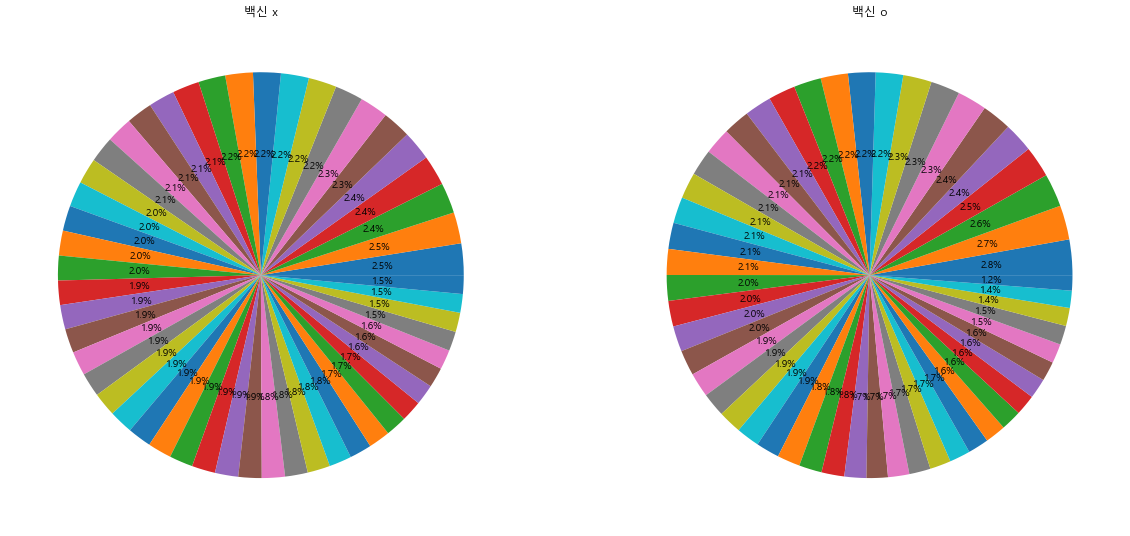

In [ ]:
fig, axes = plt.subplots(1,2)
# labels = 

fig = plt.gcf()
fig.set_size_inches(20 ,20)

plt.subplot(1,2,1)
plt.pie(train_0.sort_values('state')['state'].value_counts(), autopct='%1.1f%%')
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.pie(train_1.sort_values('state')['state'].value_counts(), autopct='%1.1f%%')
plt.title('백신 o')

- 백신 접종의 유무와 state의 비율을 확인해봤을 때 거의 차이가 없음을 확인할 수 있다.
- 따라서 drop 하기로 결정

In [ ]:
train = train.drop(['state'], axis = 1)
test = test.drop(['state'], axis = 1)

#### health_insurance

In [ ]:
train['health_insurance'].value_counts()

1.0    20302
0.0     2431
Name: health_insurance, dtype: int64

[(0.0, 14000.0)]

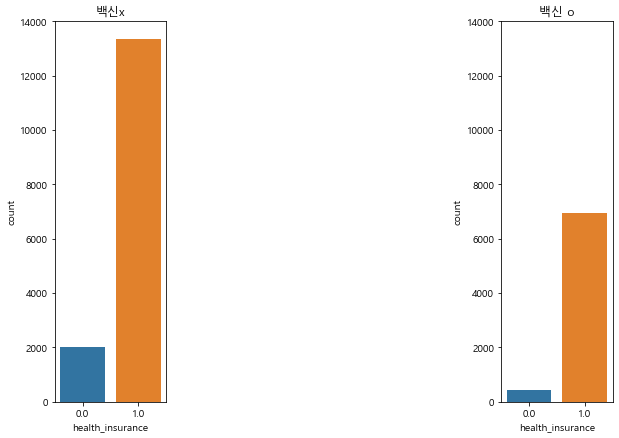

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,7))

ax1 = sns.countplot(data = train_0.sort_values('health_insurance'), x = 'health_insurance', ax = axes[0])
ax1.set_title('백신x')
ax1.set(ylim=(0, 14000))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)
ax2 = sns.countplot(data = train_1.sort_values('health_insurance'), x = 'health_insurance', ax = axes[1])
ax2.set_title('백신 o')
ax2.set(ylim=(0, 14000))

Text(0.5, 1.0, '백신 o')

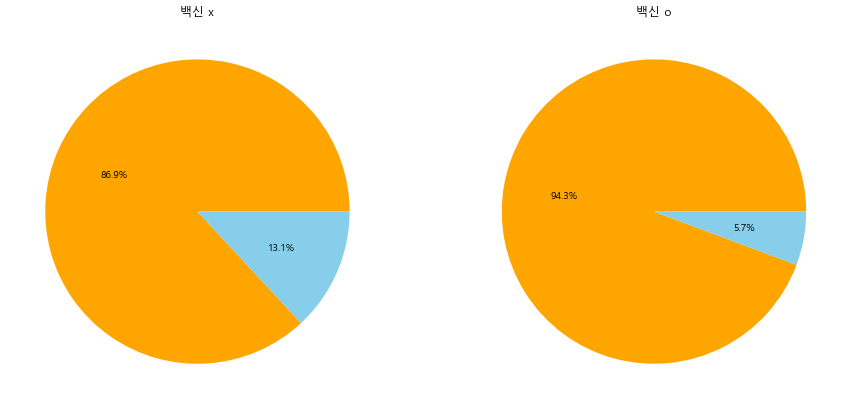

In [ ]:
fig, axes = plt.subplots(1,2)
# labels = 

fig = plt.gcf()
fig.set_size_inches(15 ,15)

plt.subplot(1,2,1)
plt.pie(train_0.sort_values('health_insurance')['health_insurance'].value_counts(), autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.pie(train_1.sort_values('health_insurance')['health_insurance'].value_counts(), autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('백신 o')

In [ ]:
train_0_2 = train_0.copy()
train_0_2['health_insurance'] = train_0_2['health_insurance'].fillna(1)
train_0_2['health_insurance'].value_counts()

1.0    30065
0.0     2012
Name: health_insurance, dtype: int64

Text(0.5, 1.0, '백신 o')

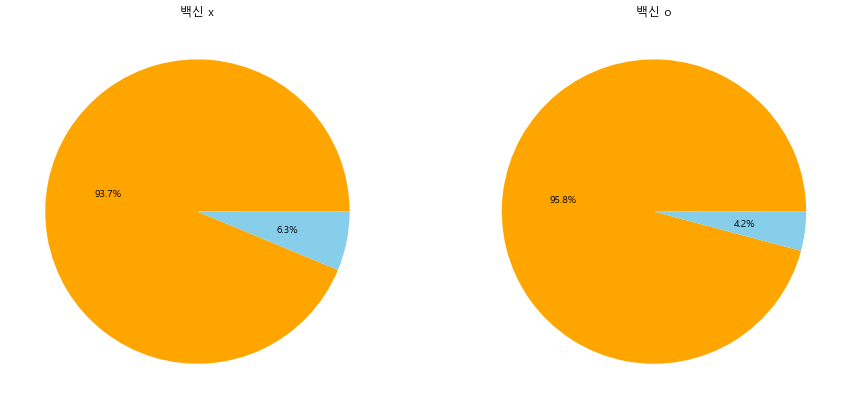

In [ ]:
train_0_2 = train_0.copy()
train_0_2['health_insurance'] = train_0_2['health_insurance'].fillna(1)

train_1_2 = train_1.copy()
train_1_2['health_insurance'] = train_1_2['health_insurance'].fillna(1)

fig, axes = plt.subplots(1,2)
# labels = 

fig = plt.gcf()
fig.set_size_inches(15 ,15)

plt.subplot(1,2,1)
plt.pie(train_0_2.sort_values('health_insurance')['health_insurance'].value_counts(), autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.pie(train_1_2.sort_values('health_insurance')['health_insurance'].value_counts(), autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('백신 o')

#### behavioral
- behavioral_ feature는 모두 전염병 예방에 긍정적인 feature들이므로 응답을 합쳐서 범주형으로 나타내기로 한다.

In [ ]:
train.behavioral_antiviral_meds.value_counts()

0.0    31930
1.0     1705
Name: behavioral_antiviral_meds, dtype: int64

In [ ]:
train.behavioral_avoidance.value_counts()

1.0    24369
0.0     9113
Name: behavioral_avoidance, dtype: int64

In [ ]:
train.behavioral_avoidance.mode()

0    1.0
dtype: float64

In [ ]:
be_fea = [col for col in train.columns if 'behavioral' in col]
be_fea

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [ ]:
def sum_be(df):
    df2 = df[be_fea]
    res = []
    for i in df2.index:
        cnt = 0
        for item in df2.columns:
            cnt += df.loc[i, item]
            
        res.append(cnt)
    
    res = np.array(res)
    
    df['behavioral'] = res
    

In [ ]:
sum_be(train)
sum_be(test)

In [ ]:
train = train.drop(be_fea, axis = 1)
test = test.drop(be_fea, axis = 1)

#### census_msa

- 우선 MSA냐 아니냐로 나눠보자

In [ ]:
train['census_msa'].value_counts()

MSA, Not Principle City    18957
MSA, Principle City        12062
Non-MSA                    11135
Name: census_msa, dtype: int64

Text(0.5, 1.0, '백신 o')

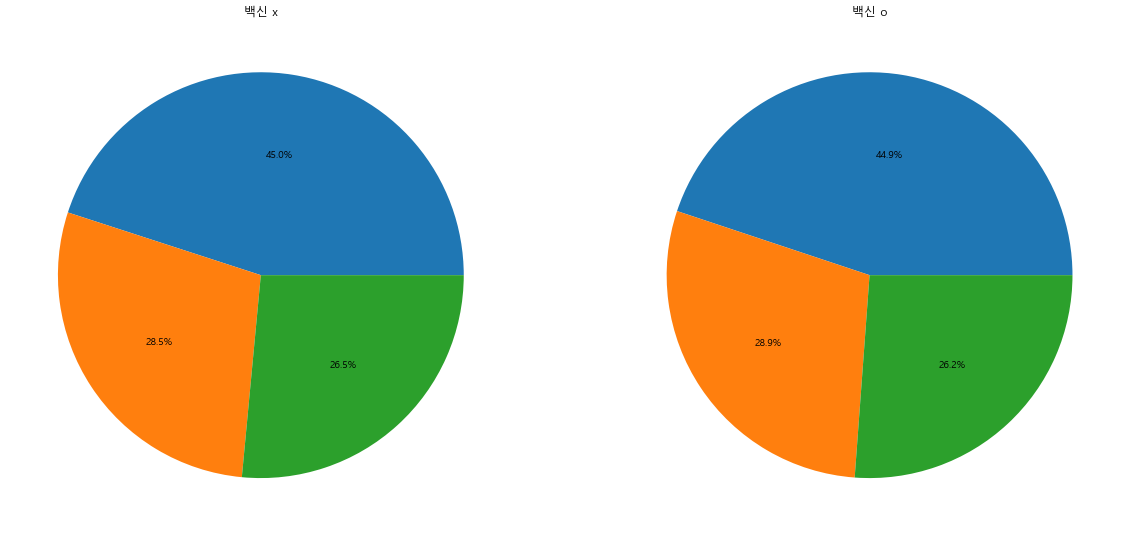

In [ ]:
fig, axes = plt.subplots(1,2)
# labels = 

fig = plt.gcf()
fig.set_size_inches(20 ,20)

plt.subplot(1,2,1)
plt.pie(train_0.sort_values('census_msa')['census_msa'].value_counts(), autopct='%1.1f%%')
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.pie(train_1.sort_values('census_msa')['census_msa'].value_counts(), autopct='%1.1f%%')
plt.title('백신 o')

In [ ]:
train_0['msa'] = 0
for i in train_0.index:
    if 'Non-MSA' in train_0.loc[i,'census_msa']:
        train_0['msa'].loc[i] = 0
    else :
        train_0['msa'].loc[i] = 1

C:\Users\GIHYEON\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
train_1['msa'] = 0
for i in train_1.index:
    if 'Non-MSA' in train_1.loc[i,'census_msa']:
        train_1['msa'].loc[i] = 0
    else :
        train_1['msa'].loc[i] = 1

[(0.0, 25000.0)]

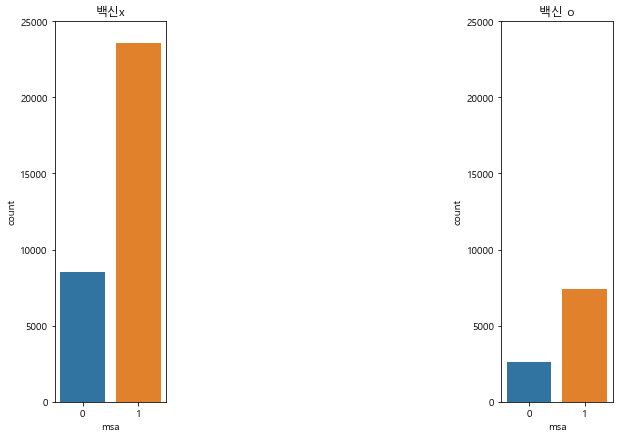

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,7))

ax1 = sns.countplot(data = train_0.sort_values('msa'), x = 'msa', ax = axes[0])
ax1.set_title('백신x')
ax1.set(ylim=(0, 25000))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=3, hspace=None)
ax2 = sns.countplot(data = train_1.sort_values('msa'), x = 'msa', ax = axes[1])
ax2.set_title('백신 o')
ax2.set(ylim=(0, 25000))

- 1은 msa에 거주, 0 은 msa 그 외 지역에 거주

Text(0.5, 1.0, '백신 o')

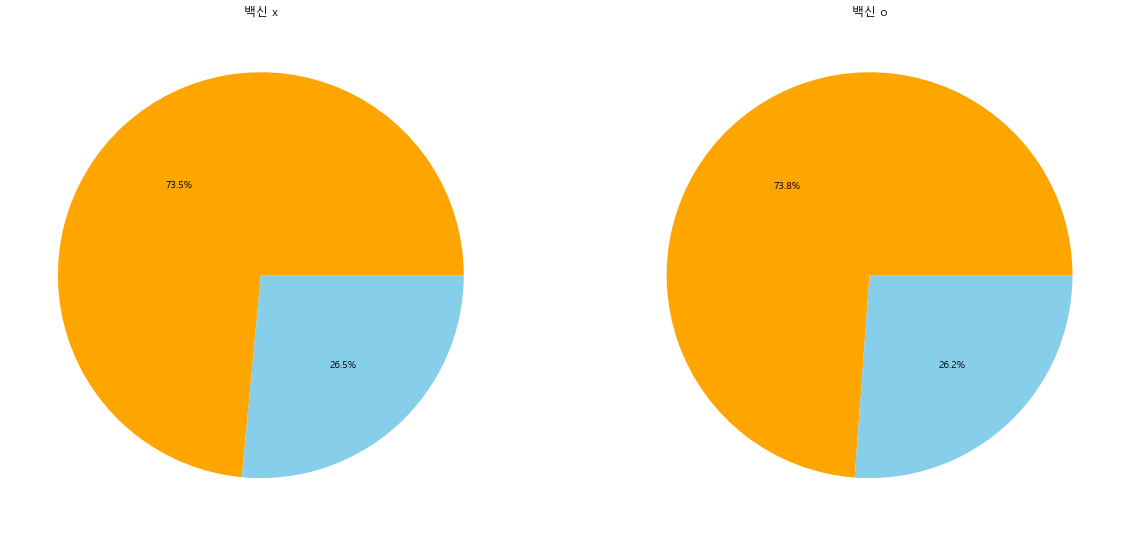

In [ ]:
fig, axes = plt.subplots(1,2)
# labels = 

fig = plt.gcf()
fig.set_size_inches(20 ,20)

plt.subplot(1,2,1)
plt.pie(train_0.sort_values('msa')['msa'].value_counts(), autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('백신 x')

plt.subplot(1,2,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.pie(train_1.sort_values('msa')['msa'].value_counts(), autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('백신 o')

- 백신 유무와 상관없이 분포가 거의 유사하므로 이 feature은 제외해도 좋을 것 같다.

In [ ]:
train = train.drop('census_msa', axis = 1)
test = test.drop('census_msa', axis = 1)

#### 결측치 처리
- 설문조사의 결과는 모두 범주형이므로 일단 결측치는 최빈값으로 처리하기로 결정

### 2) 모델 개발
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size = 0.8)

In [ ]:
feature = train.drop(target, axis = 1).columns

x_train = train[feature]
y_train = train[target]
x_val = val[feature]
y_val = val[target]
x_test = test[feature]

train.shape, x_train.shape, y_val.shape

((33723, 28), (33723, 27), (8431,))

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy')
)

pipe.fit(x_train, y_train)

print('훈련 정확도: ', pipe.score(x_train, y_train))
print('검증 정확도: ', pipe.score(x_val, y_val))

훈련 정확도:  0.9874566319722444
검증 정확도:  0.7549519629937137


#### 모델의 f1 스코어

In [ ]:
from sklearn.metrics import f1_score

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=2, criterion='entropy')
)

pipe.fit(x_train, y_train)

pred = pipe.predict(x_val)

print('모델의 f1 스코어 : ', f1_score(y_val, pred))

모델의 f1 스코어 :  0.5033653846153846


### 3) 캐글 대회 참여

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
 

In [ ]:
submission = pd.DataFrame(pipe.predict(x_test).astype('int64'), columns=[target]).reset_index().rename(columns = {'index' : 'Id'})
submission.to_csv('submission.csv', index = False)

### 4) 🔥 도전과제
- 다른 종류의 imputer를 사용해 보세요([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###